In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
X = df[["age", "chol"]]
y = df["target"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)


In [20]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear',C=1)
svm_linear.fit(x_train,y_train)

svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(x_train, y_train)


SVC(C=1)

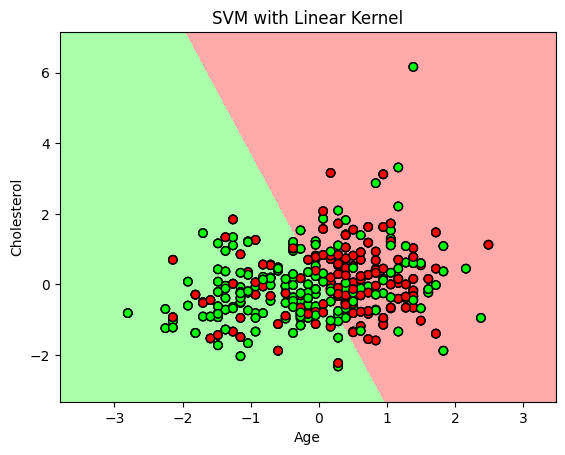

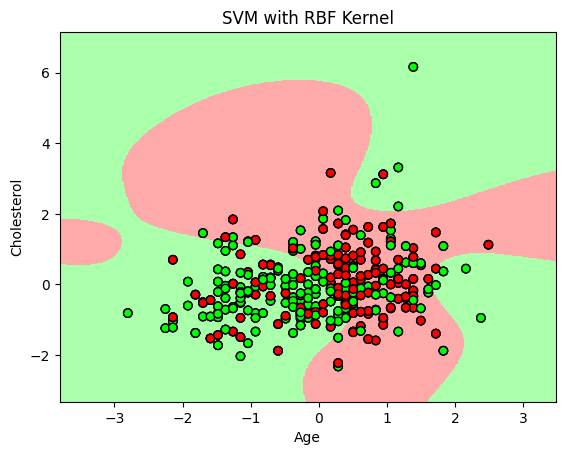

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA"])
    cmap_bold = ListedColormap(["#FF0000", "#00FF00"])

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.xlabel("Age")
    plt.ylabel("Cholesterol")
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear, X_scaled, y, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_scaled, y, "SVM with RBF Kernel")


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 1, 10],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_scaled, y)
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 100, 'gamma': 10, 'kernel': 'rbf'}


In [23]:
from sklearn.model_selection import cross_val_score

svm = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
scores = cross_val_score(svm, X_scaled, y, cv=5)

print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation accuracy scores: [0.87317073 0.83902439 0.86341463 0.87317073 0.84878049]
Mean accuracy: 0.8595121951219513
